In [2]:
%matplotlib inline
import random
import pandas as pd
import matplotlib.pyplot as plt

#################### step1.upload data ########################################
train = pd.read_json('train.json')

################## step2. preliminary data analysis############################
 
print(train.head(10)) # check data format
print(train.info()) # check missing values
print(train.describe()) # numerical data descriptions
print(train.groupby('interest_level').size())

        bathrooms  bedrooms                       building_id  \
10            1.5         3  53a5b119ba8f7b61d4e010512e0dfc85   
10000         1.0         2  c5c8a357cba207596b04d1afd1e4f130   
100004        1.0         1  c3ba40552e2120b0acfc3cb5730bb2aa   
100007        1.0         1  28d9ad350afeaab8027513a3e52ac8d5   
100013        1.0         4                                 0   
100014        2.0         4  38a913e46c94a7f46ddf19b756a9640c   
100016        1.0         2  3ba49a93260ca5df92fde024cb4ca61f   
100020        2.0         1  0372927bcb6a0949613ef5bf893bbac7   
100026        1.0         1  a7efbeb58190aa267b4a9121cd0c88c0   
100027        2.0         4                                 0   

                    created  \
10      2016-06-24 07:54:24   
10000   2016-06-12 12:19:27   
100004  2016-04-17 03:26:41   
100007  2016-04-18 02:22:02   
100013  2016-04-28 01:32:41   
100014  2016-04-19 04:24:47   
100016  2016-04-27 03:19:56   
100020  2016-04-13 06:01:42   
10002

In [3]:
# guarantee that different class have similar amount of training set
train['interest_level'] = train['interest_level'].map({'high':1, 'medium':1, 'low':0})  
print(train.groupby('interest_level').size())

interest_level
0    34284
1    15068
dtype: int64


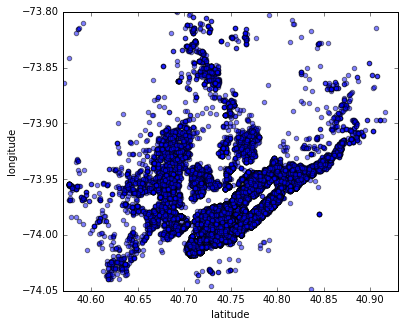

In [4]:
# plot latitude versus longitude, check location distribution, Figure 1-3

import matplotlib.pyplot as plt

figure = plt.figure(figsize=(6, 5))
plt.scatter(train['latitude'], train['longitude'], alpha=0.5)
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.xlim(40.57, 40.93)
plt.ylim(-74.05, -73.80)
plt.show()

In [5]:
# drop 'manager_id', 'building_id' for now, may come back later

train.drop(['manager_id'], inplace=True, axis=1)
train.drop(['building_id'], inplace=True, axis=1)
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 10 to 99994
Data columns (total 13 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
interest_level     49352 non-null int64
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 5.3+ MB
None


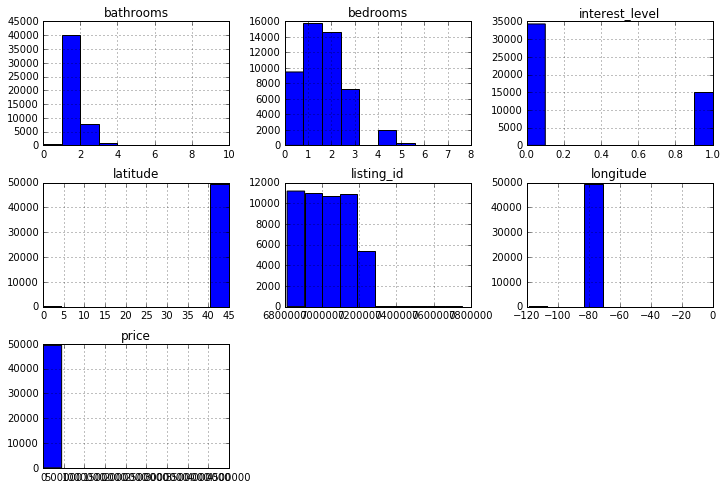

In [8]:
train.hist(figsize=(12,8))
plt.show()

In [6]:
# check missing values -- no missing values for all 13 columns
train.isnull().sum()

bathrooms          0
bedrooms           0
created            0
description        0
display_address    0
features           0
interest_level     0
latitude           0
listing_id         0
longitude          0
photos             0
price              0
street_address     0
dtype: int64

In [7]:
# visualize prices

train.sort_values(['price'], ascending = False).head(20)
train.sort_values(['price'], ascending = True).head(20)

,bathrooms,bedrooms,created,description,display_address,features,interest_level,latitude,listing_id,longitude,photos,price,street_address
53144,1.0,0,2016-05-24 05:24:56,<p><a website_redacted,Madison,"[Doorman, Elevator, High Speed Internet]",0,40.7120,7060255,-73.9971,[],43,60 Madison
87511,1.0,0,2016-04-02 02:43:15,<p><a website_redacted,W 30th St.,[Elevator],0,40.7479,6813772,-73.9917,[https://photos.renthop.com/2/6813772_323b9438...,45,140 W 30th St.
117339,1.0,1,2016-04-14 03:39:47,"Now available, absolutely stunning 1 bedroom 1...",Broadway,"[Elevator, Pre-War, Laundry in Building, Dishw...",0,40.7878,6871682,-73.9763,[https://photos.renthop.com/2/6871682_8c82f956...,401,2350 Broadway
113552,1.0,0,2016-04-13 04:20:52,,Marshall Street,[],1,40.7291,6865783,-74.2224,[https://photos.renthop.com/2/6865783_9ec986f5...,695,12 Marshall Street
85617,1.0,0,2016-04-10 03:51:11,,Marshall Street,[],1,40.7291,6852585,-74.2224,[https://photos.renthop.com/2/6852585_7ceadd50...,695,12 Marshall Street
113599,1.0,0,2016-04-06 05:24:27,,Marshall Street,[],1,40.7291,6831246,-74.2224,[https://photos.renthop.com/2/6831246_ab971bf6...,695,12 Marshall Street
102756,1.0,0,2016-04-12 03:48:49,,Marshall Street,[],1,40.7291,6859573,-74.2224,[https://photos.renthop.com/2/6859573_6ca2527f...,695,12 Marshall Street
22693,1.0,2,2016-06-08 21:40:15,Unfurnished or furnished room for rent in Quee...,"271 E Fordham Rd,",[Furnished],1,40.8624,7127753,-73.8950,[https://photos.renthop.com/2/7127753_5064613d...,700,"271 E Fordham Rd,"
109164,1.0,1,2016-04-27 19:17:48,1bdr in a 3 bdr apartment for short term with ...,2501 ditmars blvd,"[Reduced Fee, Exclusive]",1,40.7788,6934177,-73.9142,[https://photos.renthop.com/2/6934177_22156be5...,800,2501 ditmars blvd
61138,0.0,0,2016-05-02 02:49:33,A modern mid-rise elevator building located in...,2340 Beaumont Avenue,"[On-site Parking Lot, Live-in Super, Laundry i...",1,40.8529,6952911,-73.8850,[https://photos.renthop.com/2/6952911_56faa406...,868,2340 Beaumont Avenue


43 4490000


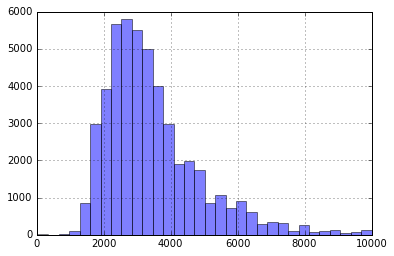

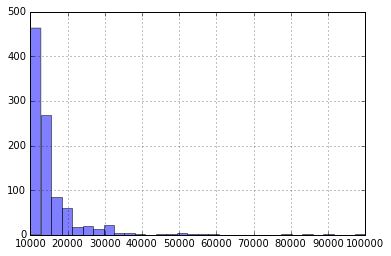

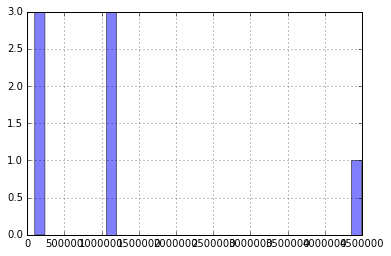

In [8]:
print(train['price'].min(), train['price'].max())

train['price'].hist(bins=32, range=(40, 10000), alpha = .5)
plt.show()

train['price'].hist(bins=32, range=(10000, 100000), alpha = .5)
plt.show()

train['price'].hist(bins=32, range=(100000, 4490000), alpha = .5)
plt.show()

0 8


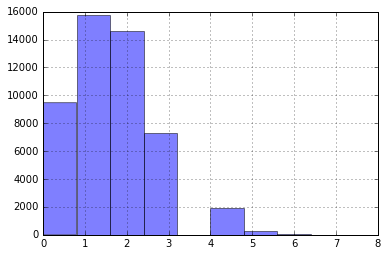

In [9]:
# visualize distribution of bedrooms, range(0-8)
print(train['bedrooms'].min(), train['bedrooms'].max())
train['bedrooms'].hist(bins=10, alpha = .5)
plt.show()

0.0 10.0


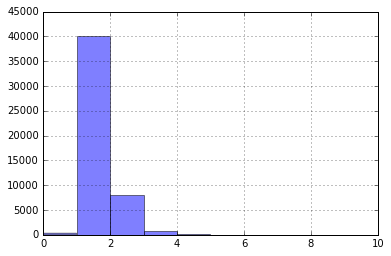

In [10]:
# visualize distribution of bathrooms, range(0-10)
print(train['bathrooms'].min(), train['bathrooms'].max())
train['bathrooms'].hist(bins=10, alpha = .5)
plt.show()

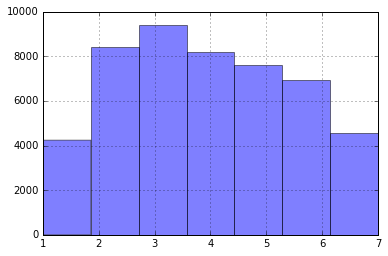

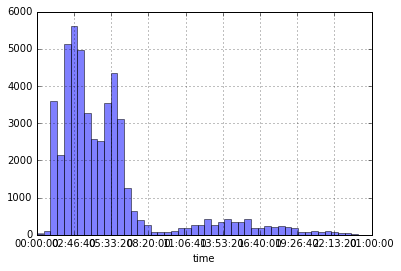

In [13]:
# change 'created' timeframe into numerical values, check distribution, divide into multiple categories
from datetime import time

times = pd.to_datetime(train['created']) # object to datetime64[ns]
# pd.Timestamp(train['created']) # object to timestamp
dayoftheweek = [t.isoweekday() for t in times]
timeoftheday = [t.time() for t in times]
pd.Series(dayoftheweek).hist(bins=7, alpha = 0.5) # Sunday and Monday least, others similar 
plt.show()
pd.Series(timeoftheday).hist(bins=48, alpha = 0.5) # 1-8 am most
plt.show()

In [14]:
daycategory = [0 if t.isoweekday() <= 5 else 1 for t in times]
hourcategory = [0 if time(9) <= t.time() and t.time() < time(17) else 1 for t in times]
train['day'] = daycategory
train['hour'] = hourcategory
train = train.drop(['created'], axis=1)

In [15]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 10 to 99994
Data columns (total 14 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
interest_level     49352 non-null int64
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
day                49352 non-null int64
hour               49352 non-null int64
dtypes: float64(3), int64(6), object(5)
memory usage: 5.6+ MB
None


In [16]:
photo_number = train['photos']
print(photo_number)

10        [https://photos.renthop.com/2/7211212_1ed4542e...
10000     [https://photos.renthop.com/2/7150865_be3306c5...
100004    [https://photos.renthop.com/2/6887163_de85c427...
100007    [https://photos.renthop.com/2/6888711_6e660cee...
100013    [https://photos.renthop.com/2/6934781_1fa4b41a...
100014    [https://photos.renthop.com/2/6894514_9abb8592...
100016    [https://photos.renthop.com/2/6930771_7e3622b6...
100020    [https://photos.renthop.com/2/6867392_b18283f6...
100026    [https://photos.renthop.com/2/6898799_3759be4c...
100027    [https://photos.renthop.com/2/6814332_e19a8552...
100030    [https://photos.renthop.com/2/6869199_06b2601f...
10004     [https://photos.renthop.com/2/7102986_ca6af538...
100044    [https://photos.renthop.com/2/6895442_34d617a5...
100048    [https://photos.renthop.com/2/6846213_83258754...
10005     [https://photos.renthop.com/2/7089402_66038eaa...
100051    [https://photos.renthop.com/2/6889043_a3e1c004...
100052    [https://photos.renthop.com/2/

In [1]:
# more feature engineering needed as follows
# get number of images per post
# find keywords in 'description' in SQL and transform 'description' into new features
# cluster addresses and then transform address into distances to cluster center
# extract photo information such as resolution, file size, also blurring/light (need to write script) 

In [17]:
# simplified ML
train = train.drop(['description', 'display_address', 'features', 'listing_id', 'latitude', 'longitude', 'photos', 'street_address'], axis=1)
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 10 to 99994
Data columns (total 6 columns):
bathrooms         49352 non-null float64
bedrooms          49352 non-null int64
interest_level    49352 non-null int64
price             49352 non-null int64
day               49352 non-null int64
hour              49352 non-null int64
dtypes: float64(1), int64(5)
memory usage: 2.6 MB
None


In [18]:
y = train['interest_level']
x = train.drop(['interest_level'], axis = 1)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

validation_size = 0.30
seed = 6
X_train, X_validation, Y_train, Y_validation = train_test_split(x, y, test_size 
                                               = validation_size, random_state = seed)
# standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))

from sklearn.metrics import accuracy_score
results = []
names = []
scoring = 'accuracy'
num_folds = 10
seed = 7

for name, model in pipelines:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)    

# compare algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

ScaledLR: 0.700689 (0.008357)
ScaledLDA: 0.695681 (0.005649)
ScaledKNN: 0.686042 (0.005991)
ScaledCART: 0.705407 (0.006959)
ScaledNB: 0.383575 (0.011517)


In [ ]:
# ensemble methods -- doesn't run somehow

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))

results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    print(msg)

# compare algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()